### Step 1: Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Step 2: Import training data

In [3]:
df = pd.read_csv('./training_data/GBPUSD_open_5year.csv')
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.sort_values(by="Date", inplace=True)
df.set_index('Date', inplace=True)


### Step 3: Separate the data to Train, Validation & Test 

In [8]:
from utils import split_train_validate_test


train_data, val_data, test_data = split_train_validate_test(df, 0.7, 0.15, 0.15)

print("Training Data Information:")
print("--------------------------")
print(f"Training Data: {train_data}")
print(f"Validation Data: {val_data.shape}")
print(f"Test Data: {test_data.shape}")


Training Data Information:
--------------------------
Training Data:             Unnamed: 0    Open        Time
Date                                      
2020-04-09           0  1.2470  1586390400
2020-04-14           1  1.2594  1586822400
2020-04-15           2  1.2498  1586908800
2020-04-16           3  1.2451  1586995200
2020-04-17           4  1.2504  1587081600
...                ...     ...         ...
2023-08-04         835  1.2757  1691107200
2023-08-07         836  1.2772  1691366400
2023-08-08         837  1.2722  1691452800
2023-08-09         838  1.2732  1691539200
2023-08-10         839  1.2735  1691625600

[840 rows x 3 columns]
Validation Data: (180, 3)
Test Data: (180, 3)


### Step 4: Scale the Open data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data[['Open']])

X_train_scaled = scaler.transform(train_data[['Open']])
X_val_scaled = scaler.transform(val_data[['Open']])
X_test_scaled = scaler.transform(test_data[['Open']])

y_train = train_data['Open'].values
y_val = val_data['Open'].values
y_test = test_data['Open'].values

[[0.49769186]
 [0.53346797]
 [0.50577034]
 [0.49221004]
 [0.50750144]
 [0.49855741]
 [0.44085401]
 [0.45701096]
 [0.47345643]
 [0.45960762]
 [0.48009233]
 [0.48788229]
 [0.48788229]
 [0.5389498 ]
 [0.51990767]
 [0.48355453]
 [0.49307559]
 [0.46653203]
 [0.44489325]
 [0.46537796]
 [0.45729948]
 [0.42729371]
 [0.41950375]
 [0.39844201]
 [0.41748413]
 [0.43450664]
 [0.43998846]
 [0.42325447]
 [0.4169071 ]
 [0.46682054]
 [0.42469706]
 [0.45527986]
 [0.46826313]
 [0.50086555]
 [0.52279284]
 [0.53433353]
 [0.5372187 ]
 [0.5712637 ]
 [0.56347374]
 [0.57039815]
 [0.57991922]
 [0.54818234]
 [0.51759954]
 [0.52336988]
 [0.53029429]
 [0.51933064]
 [0.48326601]
 [0.46624351]
 [0.49134449]
 [0.51211771]
 [0.49192152]
 [0.47922677]
 [0.45441431]
 [0.43941143]
 [0.46566647]
 [0.49422966]
 [0.4965378 ]
 [0.49711483]
 [0.50894403]
 [0.52798615]
 [0.53404501]
 [0.53952683]
 [0.55308713]
 [0.5406809 ]
 [0.51500289]
 [0.54183497]
 [0.53433353]
 [0.51673399]
 [0.54875938]
 [0.57818811]
 [0.57328332]
 [0.57

### Step 4: Implement Sliding window algorithm to covert data into Train, Validation and Test

In [ ]:
def time_sequence_generator(X, y, time_interval):
    X_range, y_range = [], []
    print(X)
    print(y)
    for i in range(len(X) - time_interval): 
        X_range.append(X[i:i+time_interval]) ## contains scaled value
        y_range.append(y[i+time_interval]) ## contains actual value 
    return np.array(X_range), np.array(y_range)

time_interval= 60

X_train_seq, y_train_seq = time_sequence_generator(X_train_scaled, y_train, time_interval)
X_val_seq, y_val_seq = time_sequence_generator(X_val_scaled, y_val, time_interval)
X_test_seq, y_test_seq = time_sequence_generator(X_test_scaled, y_test, time_interval)

[[0.49769186]
 [0.53346797]
 [0.50577034]
 [0.49221004]
 [0.50750144]
 [0.49855741]
 [0.44085401]
 [0.45701096]
 [0.47345643]
 [0.45960762]
 [0.48009233]
 [0.48788229]
 [0.48788229]
 [0.5389498 ]
 [0.51990767]
 [0.48355453]
 [0.49307559]
 [0.46653203]
 [0.44489325]
 [0.46537796]
 [0.45729948]
 [0.42729371]
 [0.41950375]
 [0.39844201]
 [0.41748413]
 [0.43450664]
 [0.43998846]
 [0.42325447]
 [0.4169071 ]
 [0.46682054]
 [0.42469706]
 [0.45527986]
 [0.46826313]
 [0.50086555]
 [0.52279284]
 [0.53433353]
 [0.5372187 ]
 [0.5712637 ]
 [0.56347374]
 [0.57039815]
 [0.57991922]
 [0.54818234]
 [0.51759954]
 [0.52336988]
 [0.53029429]
 [0.51933064]
 [0.48326601]
 [0.46624351]
 [0.49134449]
 [0.51211771]
 [0.49192152]
 [0.47922677]
 [0.45441431]
 [0.43941143]
 [0.46566647]
 [0.49422966]
 [0.4965378 ]
 [0.49711483]
 [0.50894403]
 [0.52798615]
 [0.53404501]
 [0.53952683]
 [0.55308713]
 [0.5406809 ]
 [0.51500289]
 [0.54183497]
 [0.53433353]
 [0.51673399]
 [0.54875938]
 [0.57818811]
 [0.57328332]
 [0.57

### Step 5: Hyper parameter tuning 

In [26]:
from keras_tuner import Hyperband

def build_model(hp):
	model = Sequential()
	# Add a variable number of LSTM layers
	for i in range(hp.Int('num_layers', min_value=2, max_value=7)):
		model.add(LSTM(units=hp.Int(f'units_layer_{i+1}', min_value=4, max_value=32, step=4),
					   return_sequences=(i < hp.Int('num_layers', min_value=2, max_value=4) - 1),
					   input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]) if i == 0 else None))
		model.add(Dropout(hp.Float(f'dropout_layer_{i+1}', min_value=0.1, max_value=0.5, step=0.1)))

	model.add(Dense(units=hp.Int('dense_units', min_value=4, max_value=16, step=4), activation='relu'))
	model.add(Dense(units=1))

	model.compile(optimizer=hp.Choice('optimizer', values=['adam']),
				  loss='mean_squared_error',
				  metrics=['mae', 'mse'])
	return model

# Initialize the tuner
tuner = Hyperband(
	build_model,
	objective='val_loss',
	max_epochs=50,
	factor=3,
	directory='hyperband_tuning',
	project_name='LSTM_hyperband'
)

# Perform the search
tuner.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_val_seq, y_val_seq), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
lstm_model = tuner.hypermodel.build(best_hps)

# Train the model
history = lstm_model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_data=(X_val_seq, y_val_seq))

Trial 90 Complete [00h 00m 53s]
val_loss: 0.00018417401588521898

Best val_loss So Far: 9.42616316024214e-05
Total elapsed time: 00h 16m 55s
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.2832 - mae: 1.0992 - mse: 1.2832 - val_loss: 0.1025 - val_mae: 0.3160 - val_mse: 0.1025
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2106 - mae: 0.3640 - mse: 0.2106 - val_loss: 0.0033 - val_mae: 0.0487 - val_mse: 0.0033
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1040 - mae: 0.2643 - mse: 0.1040 - val_loss: 0.0062 - val_mae: 0.0750 - val_mse: 0.0062
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0767 - mae: 0.2207 - mse: 0.0767 - val_loss: 0.0028 - val_mae: 0.0493 - val_mse: 0.0028
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0632 - mae: 0.2009 - mse: 0.0632 - val_loss: 0.0018 - val_mae: 0.0390 - val_mse: 0.0018
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0649 - mae: 0.2031 - mse: 0.0649 - val_loss: 0.

### Step 6: Evaluation

In [1]:
print(f"Best Hyperparameters: {best_hps.values}")

test_loss = lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss (LSTM): {test_loss}")

y_pred = lstm_model.predict(X_test_seq)

# y_pred = scaler.inverse_transform(np.column_stack((y_pred, np.zeros(y_pred.shape))))[:, 0]
# y_test_actual = scaler.inverse_transform(np.column_stack((y_test_seq.reshape(-1, 1), np.zeros(y_test_seq.shape))))[:, 0]

mae_lstm = mean_absolute_error(y_test_seq, y_pred)
mse_lstm = mean_squared_error(y_test_seq, y_pred)
mape_lstm = np.mean(np.abs((y_test_seq - y_pred) / y_test_seq)) * 100 

r2_lstm = r2_score(y_test_seq, y_pred)
print(f"R^2 Score: {r2_lstm:.4f}")
print(f"LSTM Model Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"Mean Squared Error (MSE): {mse_lstm:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm:.2f}%")


NameError: name 'best_hps' is not defined

### Step 7: Plotting MAE & MSE

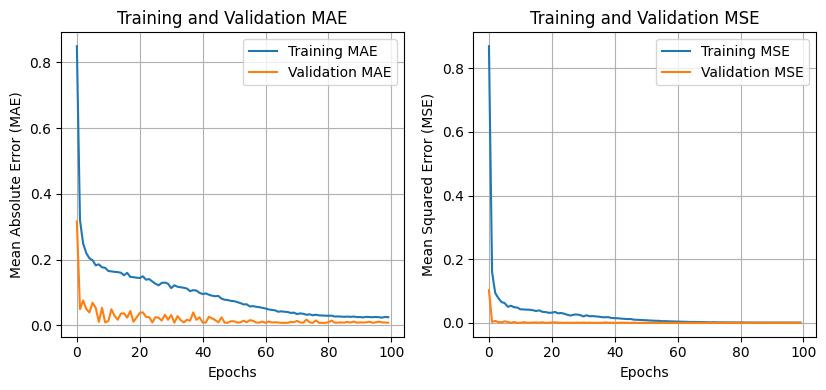

In [35]:
history_dict = history.history

plt.figure(figsize=(12, 4))

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(history_dict['mae'], label='Training MAE')
plt.plot(history_dict['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)

# MSE Plot
plt.subplot(1, 3, 3)
plt.plot(history_dict['mse'], label='Training MSE')
plt.plot(history_dict['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Step 8: Save the model

In [27]:
lstm_model.save('./output/LSTM.h5')